<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

## Missing values

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# from netCDF4 import Dataset
import xarray as xr
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better

In [2]:
f = xr.open_dataset('../data/model_temp_time.nc4')

In [3]:
f.temp.shape

(5, 9, 416, 480)

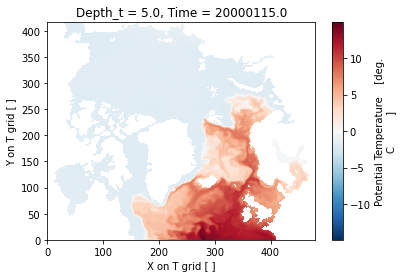

In [4]:
f.temp[0,0,:,:].plot()

Where are those blank areas come from?

In [5]:
one_field = f.temp[0,0,:,:].data

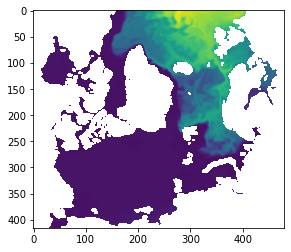

In [6]:
plt.imshow(one_field)

Simple mean will not work:

In [7]:
one_field.mean()

nan

You need a spetial `nanmean` function:

In [8]:
np.nanmean(one_field)

1.2556841

It is often easier to operate on [masked arrays](https://numpy.org/doc/stable/reference/maskedarray.generic.html).

In [9]:
field_masked = np.ma.masked_invalid(one_field)

In [10]:
field_masked

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [11]:
type(field_masked)

numpy.ma.core.MaskedArray

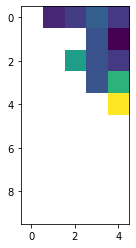

In [12]:
plt.imshow(field_masked[325:335,385:390])

In [13]:
field_masked[325:335,385:390].mask

array([[ True, False, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

Create a small example array that we will work with

In [14]:
b_masked = field_masked[325:335,385:390]
b_masked

masked_array(
  data=[[--, -1.6315103769302368, -1.624253749847412,
         -1.6130439043045044, -1.6257729530334473],
        [--, --, --, -1.6174774169921875, -1.6417274475097656],
        [--, --, -1.5885295867919922, -1.6177394390106201,
         -1.625877022743225],
        [--, --, --, -1.616289734840393, -1.5797284841537476],
        [--, --, --, --, -1.5458563566207886],
        [--, --, --, --, --],
        [--, --, --, --, --],
        [--, --, --, --, --],
        [--, --, --, --, --],
        [--, --, --, --, --]],
  mask=[[ True, False, False, False, False],
        [ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True, False, False],
        [ True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],
  fill_value=1e

## Why we need masked arrays?

Usually data that you get will look like this:

In [15]:
usuall_mask = np.ma.filled(b_masked, fill_value=-999)
usuall_mask

array([[-999.   ,   -1.632,   -1.624,   -1.613,   -1.626],
       [-999.   , -999.   , -999.   ,   -1.617,   -1.642],
       [-999.   , -999.   ,   -1.589,   -1.618,   -1.626],
       [-999.   , -999.   , -999.   ,   -1.616,   -1.58 ],
       [-999.   , -999.   , -999.   , -999.   ,   -1.546],
       [-999.   , -999.   , -999.   , -999.   , -999.   ],
       [-999.   , -999.   , -999.   , -999.   , -999.   ],
       [-999.   , -999.   , -999.   , -999.   , -999.   ],
       [-999.   , -999.   , -999.   , -999.   , -999.   ],
       [-999.   , -999.   , -999.   , -999.   , -999.   ]], dtype=float32)

## Exersise

- Suggest a solution on how to compute mean value in this case.

The way it's done with masked arrays is:

In [16]:
b_masked.mean()

-1.6106505393981934

In [17]:
b_masked.compressed()

array([-1.632, -1.624, -1.613, -1.626, -1.617, -1.642, -1.589, -1.618,
       -1.626, -1.616, -1.58 , -1.546], dtype=float32)

## Mask creation

## Exersise

- create masked array from `ussual_mask`, use
  - np.ma.masked_less
  - np.ma.masked_equal
  - np.ma.masked_inside
  - np.ma.masked_outside

## Exersise

Mask certain temperature ranges from `field_masked` variable

- mask temperatures outside -2 to 1 degrees range and plot
- mask temperatures outside  5 to 7 degrees range and plot
- mask all temperatures lower or equal 7 degrees and plot
- mask  all temperatures larger than -1 degree and plot
- calculate mean temperature of all temperatures lower than 0 degree

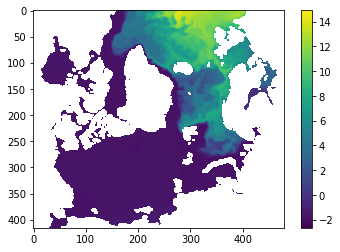

In [18]:
plt.imshow(field_masked)
plt.colorbar()

## Mask 2D areas

### Exclude Kara sea

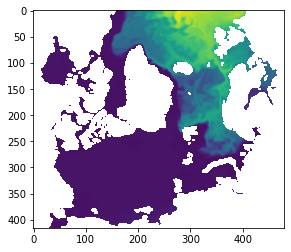

In [19]:
plt.imshow(field_masked)

In [20]:
field_masked.mean()

1.255684174296709

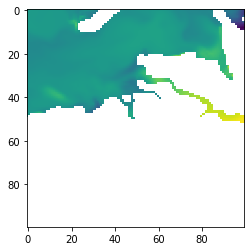

In [21]:
plt.imshow(field_masked[300:400,300:400])

Here `copy()` is very importrant!

In [22]:
field_masked_copy = field_masked.copy()

In [23]:
field_masked_copy[300:400,300:400] = -999

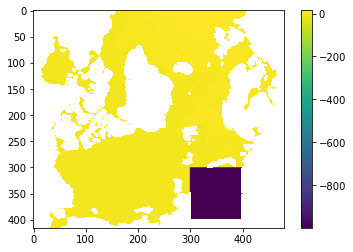

In [24]:
plt.imshow(field_masked_copy)
plt.colorbar()

In [25]:
field_masked_copy = np.ma.masked_equal(field_masked_copy, -999)

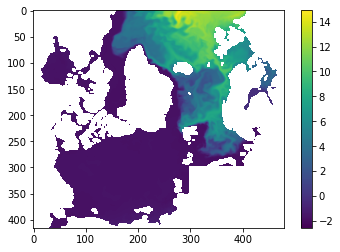

In [26]:
plt.imshow(field_masked_copy)
plt.colorbar()

In [27]:
field_masked_copy.mean()

1.3594658358985923

## Exersise

- Calculate mean temperature of `field_masked` without Arctic Ocean
- Calculate mean temperature of `field_masked` without North Atlantic

## Masked 4D

In [28]:
f = xr.open_dataset('../data/model_temp_time.nc4')

In [29]:
f.temp.values.shape

(5, 9, 416, 480)

In [30]:
temp_masked = np.ma.masked_invalid(f.temp.values)

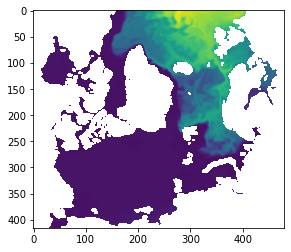

In [31]:
plt.imshow(temp_masked[0,0,:,:])

In [32]:
temp_less0 = np.ma.masked_greater_equal(temp_masked, 0)

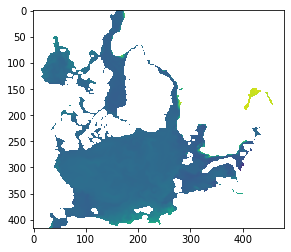

In [33]:
plt.imshow(temp_less0[0,0,:,:])

## Exersise

- Plot temperatures that are less than -0.5 degrees at time step #3 and depth level #8
- Calculate mean of this temperature

## Missing values in Pandas

In [34]:
import pandas as pd

Download data from [Permanent Service for Mean Sea Level](http://www.psmsl.org/data/)

Without missing data handling

In [35]:
kiel = pd.read_csv('../data/kiel.txt',sep=';', names=['Year','level','N','pp'],\
                   parse_dates=True, index_col='Year')

In [36]:
kiel.head()

,level,N,pp
Year,,,
1956-01-01,6993,N,0
1957-01-01,6996,N,0
1958-01-01,7003,N,0
1959-01-01,6952,N,0
1960-01-01,6958,N,0


<AxesSubplot:xlabel='Year'>

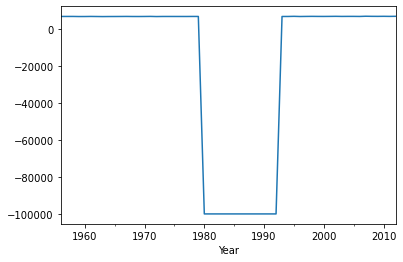

In [37]:
kiel.level.plot()

In [38]:
kiel.loc['1979':'1995']

,level,N,pp
Year,,,
1979-01-01,6993,N,0
1980-01-01,-99999,N,0
1981-01-01,-99999,N,0
1982-01-01,-99999,N,0
1983-01-01,-99999,N,0
1984-01-01,-99999,N,0
1985-01-01,-99999,N,0
1986-01-01,-99999,N,0
1987-01-01,-99999,N,0


With missing data handling

In [39]:
kiel = pd.read_csv('../data/kiel.txt',sep=';', names=['Year','level','N','pp'],\
                   parse_dates=True, index_col='Year', na_values=-99999)

<AxesSubplot:xlabel='Year'>

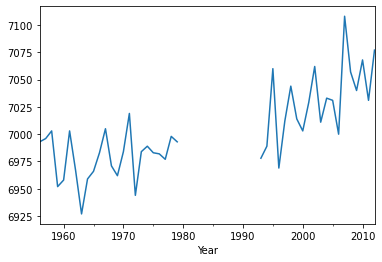

In [40]:
kiel.level.plot()

In [41]:
kiel.loc['1979':'1995']

,level,N,pp
Year,,,
1979-01-01,6993.0,N,0
1980-01-01,NaN,N,0
1981-01-01,NaN,N,0
1982-01-01,NaN,N,0
1983-01-01,NaN,N,0
1984-01-01,NaN,N,0
1985-01-01,NaN,N,0
1986-01-01,NaN,N,0
1987-01-01,NaN,N,0


<AxesSubplot:xlabel='Year'>

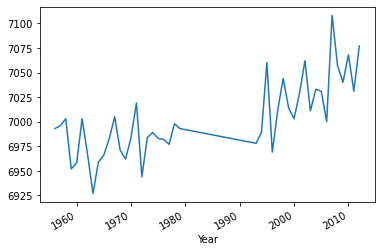

In [42]:
kiel.dropna().level.plot()

In [43]:
kiel.dropna().loc['1975':'1995']

,level,N,pp
Year,,,
1975-01-01,6983.0,N,0
1976-01-01,6982.0,N,0
1977-01-01,6977.0,N,0
1978-01-01,6998.0,N,0
1979-01-01,6993.0,N,0
1993-01-01,6978.0,N,0
1994-01-01,6989.0,N,0
1995-01-01,7060.0,N,0


In [44]:
kiel.loc['1975':'1995'].fillna(-999)

,level,N,pp
Year,,,
1975-01-01,6983.0,N,0
1976-01-01,6982.0,N,0
1977-01-01,6977.0,N,0
1978-01-01,6998.0,N,0
1979-01-01,6993.0,N,0
1980-01-01,-999.0,N,0
1981-01-01,-999.0,N,0
1982-01-01,-999.0,N,0
1983-01-01,-999.0,N,0


In [45]:
kiel['1975':'1990'].fillna(method='pad')

,level,N,pp
Year,,,
1975-01-01,6983.0,N,0
1976-01-01,6982.0,N,0
1977-01-01,6977.0,N,0
1978-01-01,6998.0,N,0
1979-01-01,6993.0,N,0
1980-01-01,6993.0,N,0
1981-01-01,6993.0,N,0
1982-01-01,6993.0,N,0
1983-01-01,6993.0,N,0
